## Plot of the temperature over time. 

### Temperature Over Time Analysis

This notebook analyses the "dryBulbTemperature_Celsius" from a weather dataset and visualizes the temperature changes over time. Using **Pandas** for data manipulation, the notebook generates a clean and aesthetically pleasing plot that shows temperature trends, making it easy to observe fluctuations and patterns.

Author: Tomasz Uszynski

Importing libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator
import matplotlib.ticker as ticker

Read CSV file.

In [2]:
# Read the data from the CSV file.
weatherReadings = pd.read_csv('data/weatherreadings1.csv')

Check the [GeeksforGeeks website](https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/#:~:text=df%20%3D%20pd.read_csv(%22people.csv%22)) to find out more about reading the data fro CSV file into Python.

Identifying the column's names.

In [ ]:
# Identifying the names of the columns in the data frame nicely formatted.
print("The columns in the data frame are:")
for column in weatherReadings.columns:
    print(column)


The columns in the data frame are:
siteId
reportStartDateTime
reportEndDateTime
collectionName
isPublic
isLatestVersion
observationType
softwareType
windDirection
relativeHumidity
windSpeed_MilePerHour
windSpeed_MetrePerSecond
dryBulbTemperature_Fahrenheit
dryBulbTemperature_Celsius
wetBulbTemperature_Fahrenheit
wetBulbTemperature_Celsius
rainfallAmount_Inch
rainfallAmount_Millimetre
rainfallRate_InchPerHour
rainfallRate_MillimetrePerHour
airPressure_InchOfMercury
airPressure_Hectopascal
dewPointTemperature_Fahrenheit
dewPointTemperature_Celsius
isOfficial
isDcnn
longitude
latitude
height
id
localReportEndDateTime
externalSiteId
createdDateTime
version
externalId


The [GeeksforGeeks website](https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/#:~:text=Iterating%20Over%20Column%20Names) in the section Iterating Over Column Names provides information on how to present the column names skilfully. To see how to select the columns which are of interest, visit the [DataCamp website](https://www.datacamp.com/tutorial/python-select-columns#:~:text=to%20access%20it.-,Selecting%20multiple%20columns,-You%20can%20extend).

In [4]:
# Check the data types of the columns which are of interest.
print(weatherReadings[['reportStartDateTime', 'reportEndDateTime', 'dryBulbTemperature_Celsius']].dtypes)


reportStartDateTime            object
reportEndDateTime              object
dryBulbTemperature_Celsius    float64
dtype: object


Because 'reportStartDateTime' and 'reportEdnDateTime' represent the same value I pick one of them and convert it to datetime format. To see how to do it, visit the [GeeksforGeeks website](https://www.geeksforgeeks.org/python-pandas-to_datetime/#:~:text=Example%202%3A%20Converting%20Time%20Format%20using%20Pandas).

Pick proper data from CSV file.

In [5]:
# Pick dryBulbTemperature_Celsius data from weatherReadings
dryBulbTemperatureCelsius = weatherReadings['dryBulbTemperature_Celsius']
# Pick reportStartDateTime data from weatherReadings
reportStartDateTime = weatherReadings['reportStartDateTime']

In [6]:
# Convert the reportStartDateTime to datetime format
reportStartDateTime = pd.to_datetime(weatherReadings['reportStartDateTime'])

# Check the data type of reportStartDateTime
print(reportStartDateTime.dtypes)

datetime64[ns, UTC]


Make the plot.

To find plot-making information, visit the [GeeksforGeeks website](https://www.geeksforgeeks.org/line-chart-in-matplotlib-python/). More details about creating a plot on [The Matplotlib website](https://matplotlib.org/stable/tutorials/pyplot.html#).
To find out how to set major ticks visit the [Stack Overflow website](https://stackoverflow.com/questions/43368302/matplotlib-hourlocator-steals-my-x-labels#:~:text=%23%20set%20a%20locator%2C%20as%20well%20as%20a%20formatter) and for minor ticks visit the [GeeksforGeeks website](https://www.geeksforgeeks.org/matplotlib-ticker-autominorlocator-class-in-python/#:~:text=set_major_formatter(ticker.NullFormatter())-,%23%20Add%20minor%20tickers,-AND%20labels%20for).


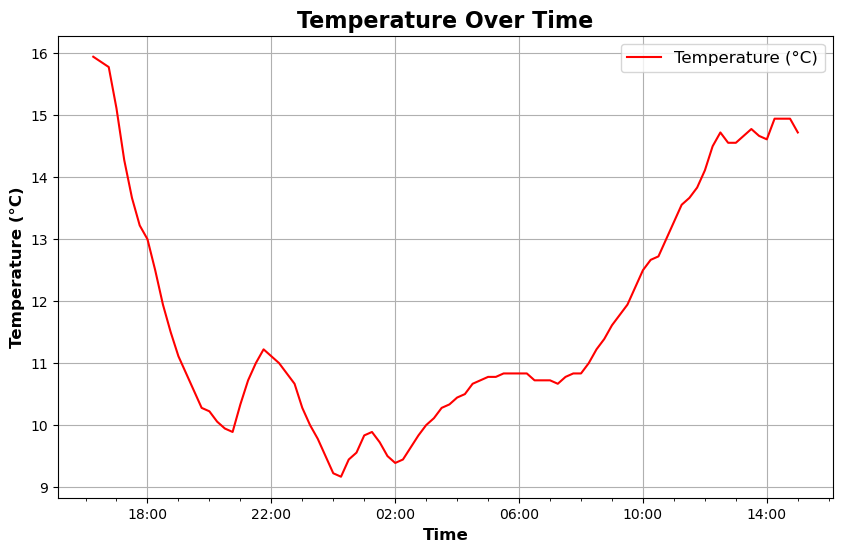

In [7]:
# Plot the temperature over time
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(reportStartDateTime, dryBulbTemperatureCelsius, linestyle='-', color='r', label='Temperature (°C)')
ax.set_title('Temperature Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel('Time', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
ax.legend(loc='upper right', fontsize=12)
ax.grid(True)

# Set x-axis major ticks to every four hours
ax.xaxis.set_major_locator(HourLocator(interval=4))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=4))
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))

plt.show()